C:\Users\Janith\AppData\Local\Temp\ipykernel_3576\3669778653.py:9: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  timestamps = pd.date_range(start='2024-01-01', periods=1000, freq='H')


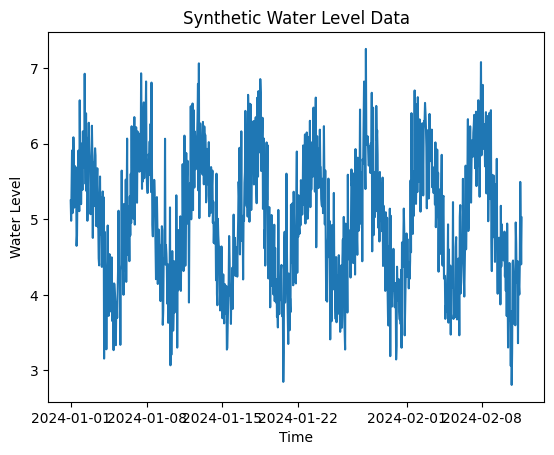

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from datetime import datetime, timedelta

# Generate synthetic data
np.random.seed(42)
timestamps = pd.date_range(start='2024-01-01', periods=1000, freq='H')
water_levels = np.sin(np.linspace(0, 50, 1000)) + np.random.normal(scale=0.5, size=1000) + 5  # Simulated water level

data = pd.DataFrame({'timestamp': timestamps, 'water_level': water_levels})

# Plot the synthetic data
plt.plot(data['timestamp'], data['water_level'])
plt.xlabel('Time')
plt.ylabel('Water Level')
plt.title('Synthetic Water Level Data')
plt.show()


In [2]:
# Extract features for clustering
data['hour'] = data['timestamp'].dt.hour
data['day'] = data['timestamp'].dt.day
data['month'] = data['timestamp'].dt.month

# Features for K-means clustering
features = data[['water_level', 'hour', 'day', 'month']]

# Normalize the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)


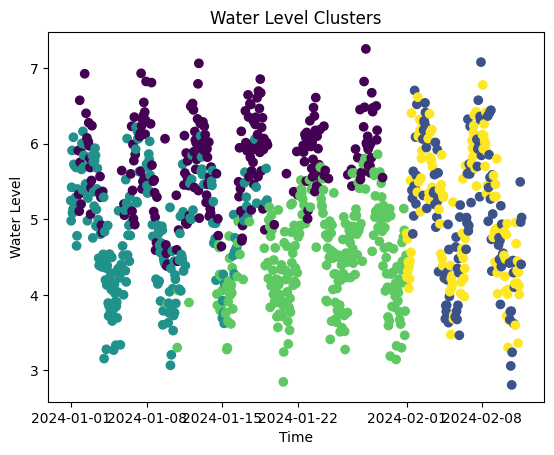

In [3]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=5, random_state=42)
data['cluster'] = kmeans.fit_predict(features_scaled)

# Visualize the clusters
plt.scatter(data['timestamp'], data['water_level'], c=data['cluster'])
plt.xlabel('Time')
plt.ylabel('Water Level')
plt.title('Water Level Clusters')
plt.show()


In [4]:
# Function to predict future water levels
def predict_future_water_levels(current_time, data, hours_ahead=3):
    future_predictions = []
    for _ in range(hours_ahead):
        current_data = data[data['timestamp'] == current_time]
        if not current_data.empty:
            cluster = current_data['cluster'].values[0]
            cluster_data = data[data['cluster'] == cluster]
            avg_future_level = cluster_data['water_level'].mean()
            future_predictions.append(avg_future_level)
        current_time += timedelta(hours=1)
    return future_predictions

# Predict water levels for the next 3 hours
#current_time = data['timestamp'].iloc[-1]
#future_levels = predict_future_water_levels(current_time, data)
#print(f'Predicted water levels for the next 3 hours: {future_levels}')


In [5]:
# Function to check flood levels and deliver alerts
def check_flood_levels(predicted_levels):
    messages = []
    for level in predicted_levels:
        if level >= 10.5:
            messages.append(f'Water Level: {level:.2f}m - Critical Flood Level! Immediate action required!')
        elif level >= 9.5:
            messages.append(f'Water Level: {level:.2f}m - Major Flood Level! Take urgent precautions!')
        elif level >= 7.5:
            messages.append(f'Water Level: {level:.2f}m - Minor Flood Level! Be prepared for possible flooding.')
        elif level >= 5.2:
            messages.append(f'Water Level: {level:.2f}m - Flood Level! Stay alert and monitor updates.')
        else:
            messages.append(f'Water Level: {level:.2f}m - No immediate flood threat detected.')
    return messages

# Function to write message to a file
def write_message(message, filename='message.txt'):
    with open(filename, 'w') as file:
        file.write(message)

# Predict water levels for the next 3 hours and generate alerts
current_time = data['timestamp'].iloc[-1]
future_levels = predict_future_water_levels(current_time, data)
alerts = check_flood_levels(future_levels)

# Write each alert message to a file
for alert in alerts:
    write_message(alert, filename=f'alert_{alerts.index(alert)+1}.txt')

# Display the alerts
#for alert in alerts:
#    print(alert)

if __name__ == "__main__":
    message = alert
    #message = "Hello from admin.py!"
    write_message(message)
    #print(f"Message '{message}' written to file.")

In [6]:
def read_message(filename='message.txt'):
    try:
        with open(filename, 'r') as file:
            message = file.read()
        return message
    except FileNotFoundError:
        return "No message found."

if __name__ == "__main__":
    message = read_message()
    print(f"Message received: '{message}'")


Message received: 'Water Level: 5.07m - No immediate flood threat detected.'
